In [482]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from math import sqrt

Basic functions:

In [483]:
def exp(tau):
    if tau != 0:
        return -tau*np.log(1-np.random.uniform())

In [484]:
def pdf(N,t0):
    return np.array([exp(t0) for i in range(N)])

In [485]:
def max(sample):    #Max of data
    m=sample[0]
    for i in sample:
        if i > m: m = i
    return m

def min(sample):
    m=sample[0]
    for i in sample:
        if i < m: m = i
    return m

Plotting the exponentially distributed data

Mean of the data 5.012914638044608


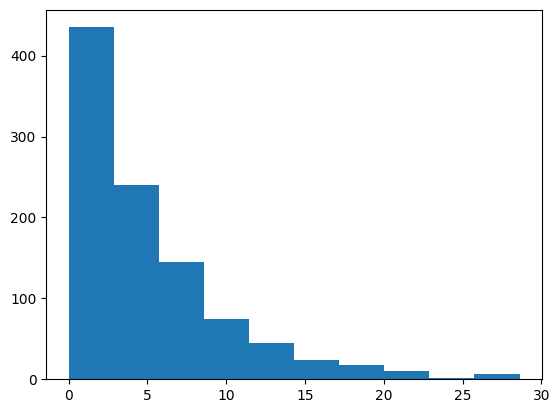

In [486]:
N = 1000
t0 = 5      #caratteristic time

dati = pdf(N,t0)

data_mean = np.average(dati)

print("Mean of the data",data_mean)

plt.hist(dati,bins=10)
plt.show()

Comparing likelihoods with different data sizes

In [487]:
def likelihood(dati,t):
    return np.prod([np.exp(-i/t)/t for i in dati])

In [488]:
def loglikelihood(dati,t):
    return np.sum([np.log(np.exp(-i/t)/t) for i in dati])

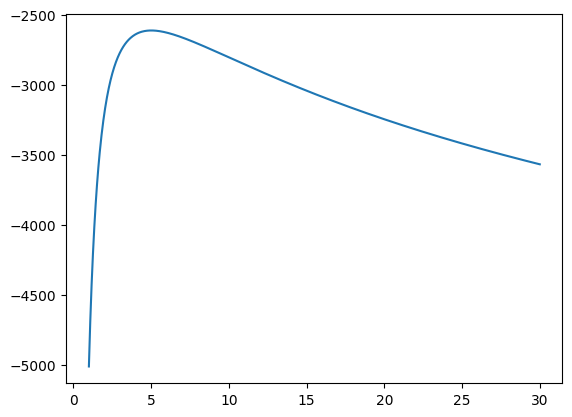

In [489]:
t_range = np.linspace(1,30,1000) #range of t0 values
logLike = [loglikelihood(dati,t) for t in t_range]

plt.plot(t_range,logLike)
plt.show()

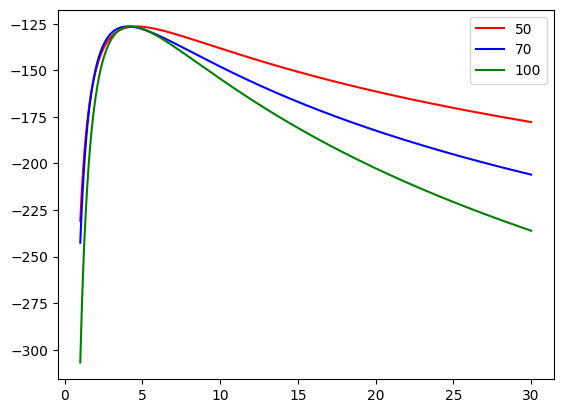

In [490]:
like1 = [loglikelihood(dati[:50],t) for t in t_range]
like2 = [loglikelihood(dati[:70],t) for t in t_range]
like3 = [loglikelihood(dati[:100],t) for t in t_range]

m1 = max(like1)
m2 = m1-max(like2)
m3 = m1-max(like3)

like2 = [i+m2 for i in like2]
like3 = [i+m3 for i in like3]

plt.plot(t_range,like1,c='red',label=50)
plt.plot(t_range,like2,c='blue',label=70)
plt.plot(t_range,like3,c='green',label=100)
plt.legend()
plt.show()

Finding Maximum

In [491]:
def max_sez_aurea(sample,func,t,prec=.001):

    r = (-1+sqrt(5))/2  #golden ratio

    xmin = min(t)
    xmax = max(t)

    while abs(xmax-xmin) > prec:

        a = xmin +     r* abs(xmax-xmin)
        b = xmin + (1-r)* abs(xmax-xmin)
        
        if func(sample,b) < func(sample,a):
            xmin = b
        else: 
            xmax = a

    return xmin,func(sample,xmin)

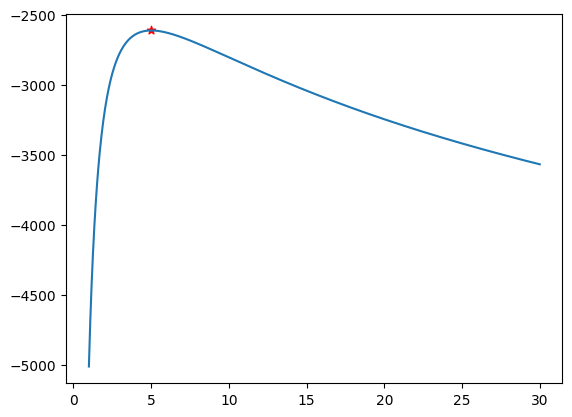

In [492]:
l = [loglikelihood(dati,i) for i in t_range]

x_max,y_max = max_sez_aurea(dati,loglikelihood,t_range)

plt.plot(t_range,l)
plt.scatter(x_max,y_max,marker='*',c='red')
plt.show()

Comparing sum and product difference log likelihood

In [493]:
t_range = np.linspace(1,5,1000) #range of t0 values

In [494]:
def loglikelihoodProd(dati,t):
    
    return np.log(likelihood(dati,t))

In [495]:
a = [loglikelihood(dati,i) for i in t_range]

In [496]:
b = [loglikelihoodProd(dati,i) for i in t_range]

/tmp/ipykernel_5535/3162459786.py:3: RuntimeWarning: divide by zero encountered in log
  return np.log(likelihood(dati,t))


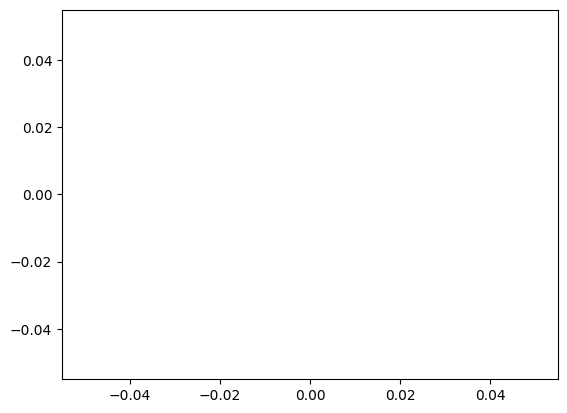

In [497]:
plt.plot(t_range,b)

Finding Zeros

In [498]:
def zeros(func,dati,xmin,xmax,prec=.001):
    
    x_max,yMax = max_sez_aurea(dati,func,t_range)
    
    a = xmin
    b = xmax

    while(abs(b-a) > prec):

        m = ((b-a)/2)+a

        fa = (func(dati,a)-yMax+0.5)
        fb = (func(dati,m)-yMax+0.5)

        if  fa*fb > 0:
            a = m
        else:
            b = m
        
    return m

In [502]:
a,b = 4,6

t_range = np.linspace(a,b,1000) #range of t0 values

x_max,y_max = max_sez_aurea(dati,loglikelihood,t_range)

l = [loglikelihood(dati,t)-y_max+0.5 for t in t_range]

z = zero1 , zero2 = zeros(loglikelihood,dati,a,x_max) , zeros(loglikelihood,dati,x_max,b)

print("T:\t",x_max)
print("T-o:\t",zero1,'\n',"T+o:\t",zero2)

T:	 5.012595550332279
T-o:	 4.857344084119225 
 T+o:	 5.1755558550137675


Mean from the data:	 5.012914638044608
Mean from the likelihood:	 5.012595550332279


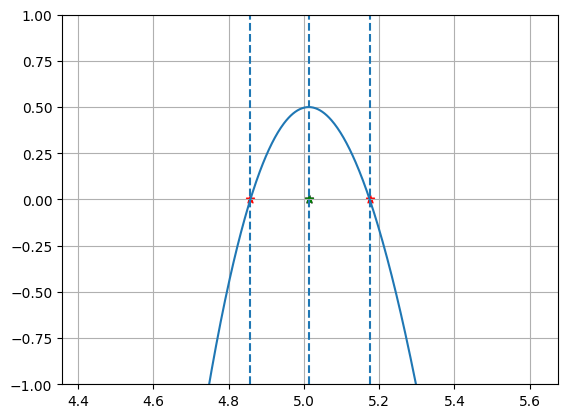

In [512]:
plt.plot(t_range,l)
plt.scatter(z,(0,0),marker = '*',c='red')

plt.scatter(data_mean,0,marker = '*',c='purple')
plt.scatter(x_max,0,marker = '*',c='green')

print("Mean from the data:\t",data_mean)
print("Mean from the likelihood:\t",x_max)

plt.vlines(x=[x_max,zero1,zero2],ymin=-1,ymax=1,linestyles='--')

plt.ylim(-1,1)
plt.xlim(zero1-.5,zero2+.5)
plt.grid(True)